<h1>Analise de Doença Cardíaca</h1>
<p><font color="red"> Autor: João Paulo Ribeiro dos Santos </font></p>

<p>Texto sobre notebook</p>

<h2>Importações</h2>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import pickle
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import OrderedDict
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image

%matplotlib inline 

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


<h2>Captando e Entendo os Dados</h2>

In [2]:
df_heart_disease = pd.read_csv('heart.csv')

In [3]:
## Dimensão do dataframe
print("Dimensão do dataframe: ", df_heart_disease.shape)

Dimensão do dataframe:  (303, 14)


In [4]:
## Primeiras 5 Linhas do Dataframe
df_heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h3>Dicionário das colunas</h3>

|Variável	|Descrição                                        |
|-----------|-------------------------------------------------|	
|Age	    |Idade do Paciente                                |
|Sex	    |Sexo do Paciente                                 |
|Cp	        |Tipo de dor no peito                             |
|Trestbps	|pressão arterial em repouso da pessoa            |
|Chol	    |Medição do colesterol da pessoa em mg / dl       |
|Fbs	    |O açúcar no sangue em jejum da pessoa            |
|Restecg	|Medida eletrocardiográfica em repouso            |
|Thalach	|A frequência cardíaca máxima da pessoa alcançada |
|Exang	    |Angina induzida pelo exercício (1 = sim; 0 = não)|
|Oldpeak	|Depressão de ST induzida por exercício em rela...|
|Slope	    |A inclinação do segmento ST do pico              |
|Ca	        |O número de navios principais (0-3)              |
|Thal	    |Um distúrbio sanguíneo chamado talassemia        |
|Target	    |Doença cardíaca (0 = não, 1 = sim)               |


<p>
<ol>
    <ul> <font color="red">age:</font> a idade da pessoa em anos</ul>
    <ul> <font color="red">sex:</font> o sexo da pessoa (1 = masculino, 0 = feminino)</ul>
    <ul> <font color="red">cp:</font> Dor no peito (Valor 0: angina típica, Valor 1: angina atípica, Valor 2: dor não anginal, Valor 3: assintomático)</ul>
    <ul> <font color="red">trestbps:</font> pressão arterial em repouso da pessoa (mm Hg na admissão no hospital)</ul>
    <ul> <font color="red">chol:</font> Medição do colesterol da pessoa em mg / dl</ul>
    <ul> <font color="red"> fbs:</font> O açúcar no sangue em jejum da pessoa (> 120 mg / dl, 1 = verdadeiro; 0 = falso)</ul>
    <ul> <font color="red">restecg:</font> Medida eletrocardiográfica em repouso (0 = normal, 1 = com anormalidade da onda ST-T, 2 = mostrando hipertrofia * * * provável ou definitiva do ventrículo esquerdo pelo critério de Estes)</ul>
    <ul> <font color="red">thalach:</font> A frequência cardíaca máxima da pessoa alcançada</ul>
    <ul> <font color="red">exang:</font> Angina induzida pelo exercício (1 = sim; 0 = não)</ul>
    <ul> <font color="red">oldpeak:</font> depressão do ST induzida pelo exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG. Veja mais aqui)</ul>
    <ul> <font color="red">declive:</font> a inclinação do pico do segmento ST do exercício (Valor 1: ascendente, Valor 2: plano, Valor 3: descendente)</ul>
    <ul> <font color="red">ca:</font> O número de navios principais (0-3)</ul>
    <ul> <font color="red">thal:</font> um distúrbio sanguíneo chamado talassemia (3 = normal; 6 = defeito fixo; 7 = defeito reversível)</ul>
    <ul> <font color="red">target:</font> Doença cardíaca (0 = não, 1 = sim)</ul>
</ol>
</p>

In [5]:
## Renomeando as colunas
dict_colunas = {'age': "idade", 
                'sex': "sexo", 
                'cp': "tp_dor_peito", 
                'trestbps': "pressao_art_repouso", 
                'chol': "medicao_colesterol", 
                'fbs': "acucar_sangue_jejum",
                'restecg': "medida_eletrocardio",
                'thalach': "freq_cardiaca_max", 
                'exang': "angina_induzida", 
                'oldpeak': "depressao_st", 
                'slope': "inclina_segment_st", 
                'ca': "num_navios_principais",
                'thal': "disturbio_talassemia",
                'target' : "target_doenca_cardiaca"}

df_heart_disease.rename(columns = dict_colunas, inplace = True)

In [6]:
## Primeiras 5 Linhas
df_heart_disease.head(5)

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2>EDA - Exploratory Data Analysis</h2>

<h3>Tratamento dos valores nulos no dataframe</h3>

In [7]:
## Porcentagem de valores nulos por dataframe
df_heart_disease.isnull().sum() / len(df_heart_disease) * 100

idade                     0.0
sexo                      0.0
tp_dor_peito              0.0
pressao_art_repouso       0.0
medicao_colesterol        0.0
acucar_sangue_jejum       0.0
medida_eletrocardio       0.0
freq_cardiaca_max         0.0
angina_induzida           0.0
depressao_st              0.0
inclina_segment_st        0.0
num_navios_principais     0.0
disturbio_talassemia      0.0
target_doenca_cardiaca    0.0
dtype: float64

<p><b>Como não há valores nulos, não há o que tratar.</b></p> 🙌
<p>Obs.: Poupamos muito trabalho com isso !!!! </p>

<h3>Identificar os Outliers no Dataframe</h3>

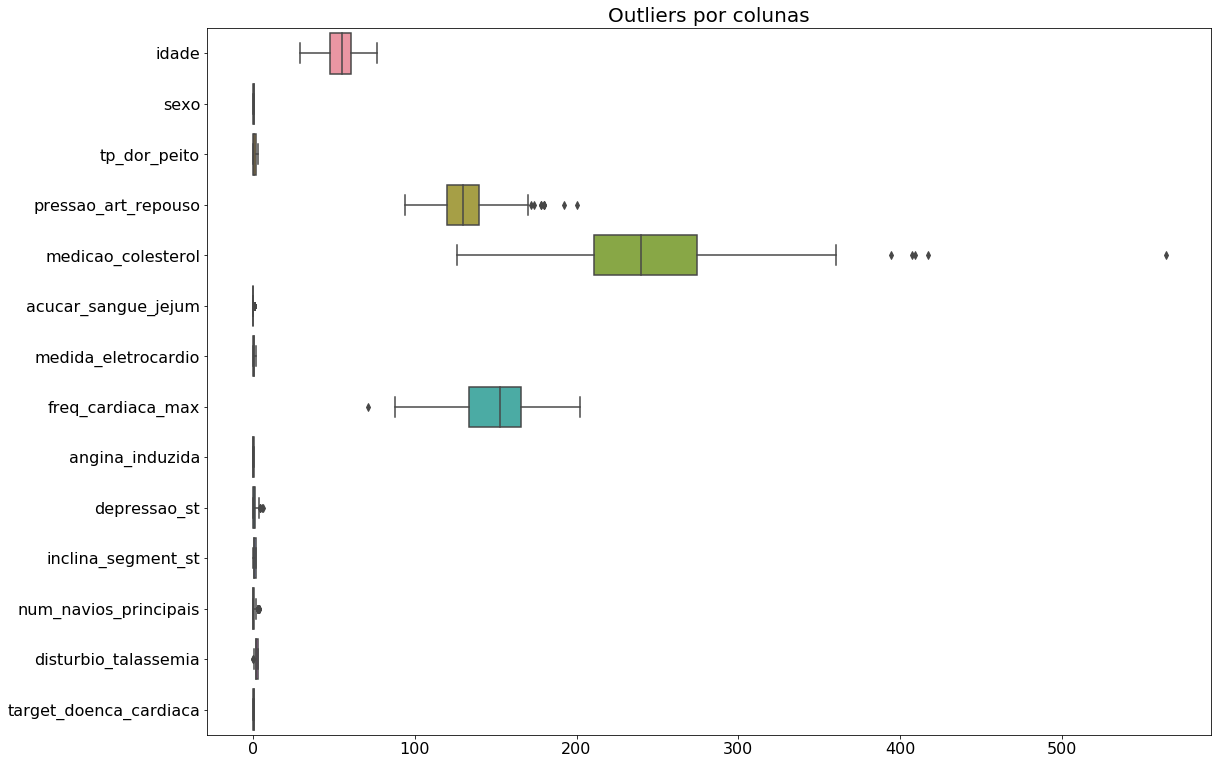

In [8]:
## Boxplot com os outliers

# Plotagem da Figura
plt.figure(figsize = (18,13))
# Plotagem do boxplot horizontal
ax = sns.boxplot(data = df_heart_disease,
                 orient = 'h')
# Titulo do gráfico
ax.axes.set_title("Outliers por colunas",fontsize=20)
# Tamanho das fontes dos eixos x e y
ax.tick_params(labelsize= 16)
# Exibir o gráfico
plt.show()

In [9]:
## Funções de auxilio na detecção das quantidades dos outliers por coluna
def fn_validating_dataframe(p_df_dataframe):
    """
        Description:
            Validates information related to the 
            dataframe.

        Keyword arguments:
            p_df_dataframe -- the dataframe 

        Return:
            None

        Exception:
            Validates whether the object passed is a pandas dataframe;
            Validates that the dataframe is empty.
    """
    
    if not (isinstance(p_df_dataframe, pd.DataFrame)):
            raise Exception("O Objeto passado não é um pandas dataframe.")
            
    if p_df_dataframe.empty:
            raise Exception("O dataframe está vazio.")

 #################################################################################################################           
            
def fn_number_of_outliers_per_dataframe(p_df_dataframe):
    """
        Description:
            Validates the number of outliers on a dataframe

        Keyword arguments:
            p_df_dataframe -- the dataframe 

        Return:
            Object with the number of outliers per column

        Exception:
            Validates whether the object passed is a pandas dataframe;
            Validates that the dataframe is empty.
    """
    
    fn_validating_dataframe(p_df_dataframe)
        
    Q1 = p_df_dataframe.quantile(0.25)
    Q3 = p_df_dataframe.quantile(0.75)
    IQR = Q3 - Q1
    sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    return sr_out           

In [10]:
fn_number_of_outliers_per_dataframe(df_heart_disease)

idade                      0
sexo                       0
tp_dor_peito               0
pressao_art_repouso        9
medicao_colesterol         5
acucar_sangue_jejum       45
medida_eletrocardio        0
freq_cardiaca_max          1
angina_induzida            0
depressao_st               5
inclina_segment_st         0
num_navios_principais     25
disturbio_talassemia       2
target_doenca_cardiaca     0
dtype: int64

<p>Umas vez sabendo quais as colunas com outliers, o que nos restá e verificar coluna a coluna, quais os outliers e se faz sentido eles existirem</p>
<p>As colunas com outliers são: <b><i>pressao_art_repouso, medicao_colesterol, acucar_sangue_jejum, freq_cardiaca_max, depressao_st, num_navios_principais, diturbio_talassemia</i></b></p>
<p>Para isso usaremos a função a seguir que identifica os outilers passando o dataframe e a coluna.</p>

In [11]:
## Função que captura os outliers
def fn_catching_outliers(p_df_dataframe, p_column):
    """
    Description:
        Function that locates outliers in an informed dataframe.

    Keyword arguments:
        p_df_dataframe -- the dataframe 
        p_column -- the dataframe column

    Return:
        df_with_outliers -- Dataframe with the outliers located
    
    Exception:
        None
    """
    # Check if the information passed is valid.
    fn_number_of_outliers_per_dataframe(p_df_dataframe)
    
    # Calculate the first and the third qurtile of the dataframe  
    Q1 = p_df_dataframe[p_column].quantile(0.25)
    Q3 = p_df_dataframe[p_column].quantile(0.75)    
  
    
    # Calculate the interquartile value
    IQR = Q3 - Q1
    
    #sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    
    # Generating the fence hig and low values
    fence_high = Q3 + (1.5 * IQR)
    fence_low = Q1 - (1.5 * IQR)
    
    # And Finally we are generating two dataframes, onde with the outliers values and the 
    # second with the values within values
    df_with_outliers = p_df_dataframe[((p_df_dataframe[p_column] < fence_low) | \
                                       (p_df_dataframe[p_column] > fence_high))]
    
    if df_with_outliers.empty:
        print("Não foram detectados outliers.")
    
    return df_with_outliers

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>pressao_art_repouso</i></font></h4>

In [12]:
df_out = fn_catching_outliers(df_heart_disease, 'pressao_art_repouso')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [13]:
## Verificar algumas estatisticas dos outliers 
df_out.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,59.222222,0.444444,0.888889,181.555556,271.444444,0.444444,0.666667,151.555556,0.666667,1.633333,1.111111,0.555556,2.666667,0.333333
std,5.629782,0.527046,1.166667,8.875685,41.848271,0.527046,0.707107,21.909536,0.500000,1.767767,0.781736,0.881917,0.500000,0.500000
min,52.000000,0.000000,0.000000,172.000000,199.000000,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,55.000000,0.000000,0.000000,178.000000,249.000000,0.000000,0.000000,143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,59.000000,0.000000,0.000000,180.000000,274.000000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,64.000000,1.000000,2.000000,180.000000,288.000000,1.000000,1.000000,162.000000,1.000000,3.400000,2.000000,1.000000,3.000000,1.000000
max,68.000000,1.000000,3.000000,200.000000,327.000000,1.000000,2.000000,195.000000,1.000000,4.200000,2.000000,2.000000,3.000000,1.000000


In [14]:
## Verificar algumas estatisticas dos 'valores normais' 
df_heart_disease.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Foram identificados 9 outliers na coluna <b>pressao_art_repouso</b> mas conforme a tabela informada abaixo, os valores mostrados não são discrepantes e são relativamente comuns.
<p>Seria interessante criar uma coluna que determinasse a categoria do colesterol</p>
    
<b>Fonte Tabela:</b> https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings </p>

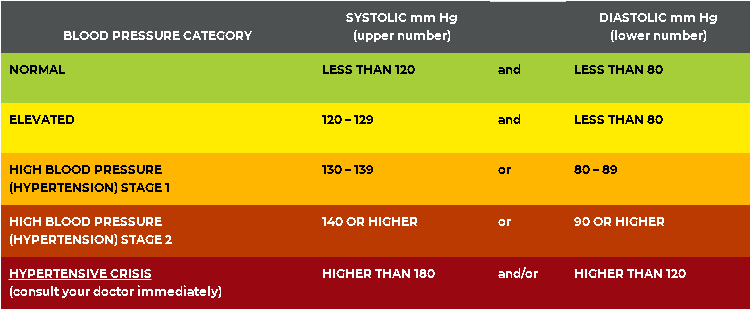

In [15]:
Image(filename='blood pressure.png')

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>medicao_colesterol</i></font></h4>

In [16]:
df_out = fn_catching_outliers(df_heart_disease, 'medicao_colesterol')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [17]:
## Verificar algumas estatisticas dos outliers 
df_out.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000
mean,62.600000,0.0,0.800000,135.800000,438.200000,0.200000,0.0,155.600000,0.200000,1.90000,1.200000,1.20000,2.600000,0.600000
std,4.159327,0.0,1.095445,12.969194,70.807485,0.447214,0.0,3.781534,0.447214,1.24499,0.447214,1.30384,0.547723,0.547723
min,56.000000,0.0,0.000000,115.000000,394.000000,0.000000,0.0,150.000000,0.000000,0.80000,1.000000,0.00000,2.000000,0.000000
25%,62.000000,0.0,0.000000,134.000000,407.000000,0.000000,0.0,154.000000,0.000000,1.20000,1.000000,0.00000,2.000000,0.000000
50%,63.000000,0.0,0.000000,140.000000,409.000000,0.000000,0.0,157.000000,0.000000,1.60000,1.000000,1.00000,3.000000,1.000000
75%,65.000000,0.0,2.000000,140.000000,417.000000,0.000000,0.0,157.000000,0.000000,1.90000,1.000000,2.00000,3.000000,1.000000
max,67.000000,0.0,2.000000,150.000000,564.000000,1.000000,0.0,160.000000,1.000000,4.00000,2.000000,3.00000,3.000000,1.000000


In [18]:
## Verificar algumas estatisticas dos 'valores normais' 
df_heart_disease.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Existem 5 pacientes com o colesterol extremamente elevado, considerando a tabela abaixo e o que determina o <b> Journal of the American College of Cardiology (JACC)</b> os indices estão dentro dos padrões.
</p>        
<p><b>Fonte Tabela: </b>https://www.healthline.com/health/high-cholesterol/levels-by-age#adults </p>

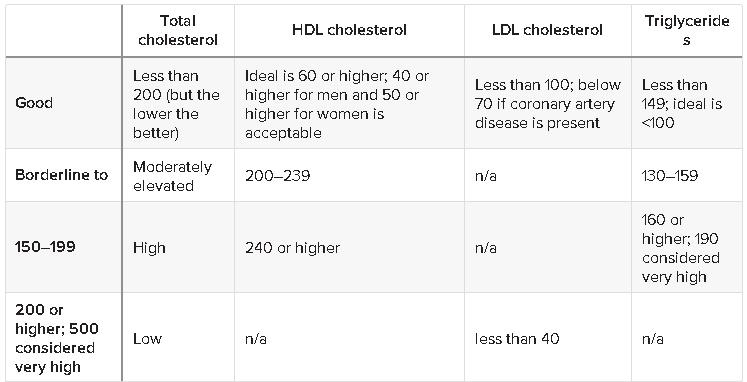

In [19]:
Image(filename = "cholesterol_table.png")

<p>Dados os valores poderemos categorizar o nivel de colesterol mais a frente criando uma nova coluna.</p>


<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>freq_cardiaca_max</i></font></h4>

In [20]:
df_out = fn_catching_outliers(df_heart_disease, 'freq_cardiaca_max')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [21]:
## Verificar algumas estatisticas dos 'valores normais' 
df_heart_disease.describe()

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Existe 1 paciente com a frequencia cardíaca muito baixa, considerando a tabela abaixo e o que determina a<b> Harvard Health Publishing</b> e a <b>American Hearth Association</b> os indices estão distantes dos padrões.
</p>        
<p><b>Fonte Tabela(1): </b> https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates</p>
<p><b>Fonte Tabela(2): </b> https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you </p>

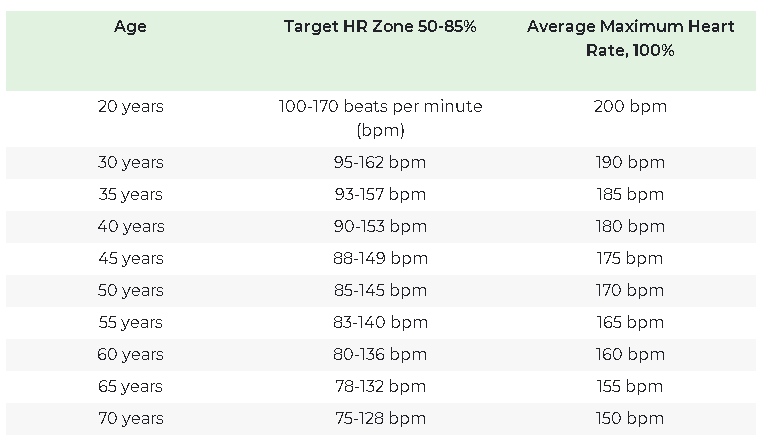

In [22]:
Image(filename = "heart.png")

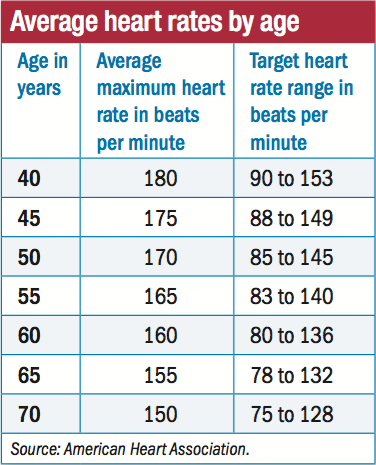

In [23]:
Image(filename = "average-heart-rate.png")

<p>Nesse cenário a melhor opção é alterar o dado com base na média de sua idade.</p>

In [24]:
## Captar a media da idade e atribuí-la a linha e colunas onde esta o outlier
median = df_heart_disease.loc[(df_heart_disease['idade'] == 67), 'freq_cardiaca_max'].mean()
df_heart_disease.at[272, 'freq_cardiaca_max'] = median

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>depressao_st</i></font></h4>

In [25]:
df_out = fn_catching_outliers(df_heart_disease, 'depressao_st')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [26]:
df_out['depressao_st'].describe()

count    5.000000
mean     4.920000
std      0.923038
min      4.200000
25%      4.200000
50%      4.400000
75%      5.600000
max      6.200000
Name: depressao_st, dtype: float64

In [27]:
df_heart_disease['depressao_st'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: depressao_st, dtype: float64

<p>Foram identificados 5 outliers correspondentes a coluna <b>depressao_st</b> alguns artigos informam que o valor normal dessa coluna, varia entre 0 a 1.5, todavia podem existir doenças ou mesmo causas, que façam esse valor ser maior que 5 por exemplo.</p>
<p>Como apenas um desses outliers determinou que o paciente possui uma doença cardíaca, seria interessante verificar se tal coluna possui alguma correlação com as demais, principalmente a variavel alvo, e caso não tenha poderemos removê-la.</p>

<p><b>Fonte Estudos: </b> https://pt.my-ekg.com/como-ler-ecg/segmento-st.html </p>

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>diturbio_talassemia</i></font></h4>

In [29]:
df_out = fn_catching_outliers(df_heart_disease, 'disturbio_talassemia')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [31]:
df_heart_disease['disturbio_talassemia'].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: disturbio_talassemia, dtype: float64

<p>Foram encontrados 2 outliers relacionados a coluna <b>disturbio_talassemia</b>, Sendo que as Talassemias são um grupo de doenças hereditárias que se caracterizam pela redução ou ausência de hemoglobina.</p>

<p>Os outliers possuem valores zerados nesse campo, sendo que o comum é variarem de 2 a 3. Será preciso ver o grau de correlação dessa variável, para saber o que fazer com esses outliers</p>

<h4>A seguir utilizaremos a função para identificar os outliers da coluna <font color = 'blue'><i>num_navios_principais</i></font></h4>


In [32]:
df_out = fn_catching_outliers(df_heart_disease, 'num_navios_principais')
df_out

,idade,sexo,tp_dor_peito,pressao_art_repouso,medicao_colesterol,acucar_sangue_jejum,medida_eletrocardio,freq_cardiaca_max,angina_induzida,depressao_st,inclina_segment_st,num_navios_principais,disturbio_talassemia,target_doenca_cardiaca
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


<p>Foram encontrados 2 outliers relacionados a coluna <b>num_navios_principais</b>, sendo que apenas com essa informação, principalmente a relacionada a coluna, não foi possivel localizar nenhum artigo que tenha relação com navios e coração. Sendo assim mantemos esse outlier, a depender do seu grau de correlação, poderemos atualizá-lo para a mediana dos valores</p>